In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/placement.csv')
df.sample(5)

,cgpa,package
87,8.09,3.55
100,7.95,4.14
121,6.50,3.02
110,8.18,3.76
187,6.26,2.44


In [3]:
df.shape

(200, 2)

In [4]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

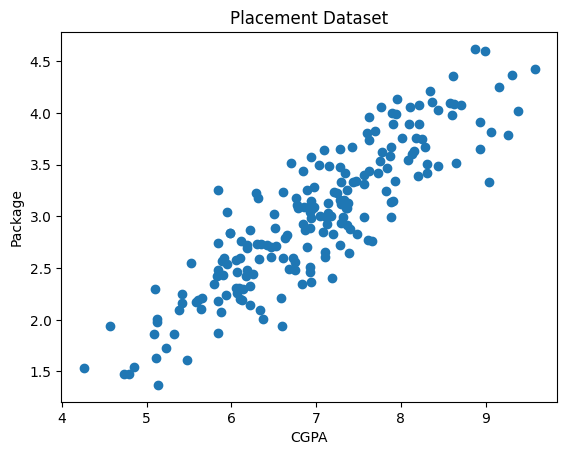

In [5]:
plt.scatter(X, y)
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Placement Dataset')
plt.show()

## Simple Linear Regression from scrtach

In [20]:
# sipmple linear regression using OLS method
class MyLinearRegression:
    def __init__(self):
        self.__m = 0
        self.__b = 0

    # training the model
    def fit(self, X, y):
        p = 0
        q = 0
        x_mean = X.mean()
        y_mean = y.mean()
        for i in range(X.shape[0]):
            p += (X[i] - x_mean) * (y[i] - y_mean)
            q += (X[i] - x_mean)**2
        self.__m = p/q
        self.__b = y_mean - x_mean * self.__m

    # predicting target value
    def predict(self, x):
        return self.__m * x + self.__b

    # returns values of slope & intercept
    def get_parameters(self):
        return self.__m, self.__b

    # evaluation metrics
    def evaluate(self, y_true, y_pred):
        print("Mean Absolute Error =\t", self.__mae(y_true, y_pred))
        print("Mean Squared Error =\t", self.__mse(y_true, y_pred))
        print("Root Mean Squared Error t", self.__rmse(y_true, y_pred))
        print("R2 Score =\t", self.__r2(y_true, y_pred))

    # mean absolute error
    def __mae(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += abs(y_true[i] - y_pred[i])
            return err / len(y_true)

    # mean square error
    def __mse(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += (y_true[i] - y_pred[i]) ** 2
            return err / len(y_true)

    # root mean square error
    def __rmse(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += (y_true[i] - y_pred[i]) ** 2
            return np.sqrt(err / len(y_true))

    # R2 score
    def __r2(self, y_true, y_pred):
        ssr = ((y_true - y_pred)** 2).sum()
        ssm = ((y_true - y_true.mean()) ** 2).sum()
        return 1 - ssr/ssm

In [21]:
xTrain, xTest = X[:150], X[150:]
yTrain, yTest = y[:150], y[150:]

In [22]:
model = MyLinearRegression()
model.fit(xTrain, yTrain)

In [23]:
model.predict(6.19)

np.float64(2.506571515285228)

In [24]:
model.predict(np.array([7.29, 6.35]))

array([3.14842576, 2.59993213])

In [25]:
model.predict(xTest)

array([2.57075694, 2.46572624, 3.19510607, 3.52770328, 3.02588995,
       2.96753957, 3.20094111, 2.6699526 , 2.36653059, 3.97700125,
       3.05506515, 3.1542608 , 2.12145897, 4.1053721 , 4.1812276 ,
       3.68524932, 3.91281583, 3.63856901, 3.94199102, 4.32710357,
       2.52407663, 3.56854855, 2.93836437, 2.83333368, 3.16593088,
       3.0025498 , 2.5649219 , 3.03172499, 3.65023909, 3.06090019,
       2.50657152, 3.69108436, 2.32568532, 3.14259073, 3.49269304,
       2.57659198, 3.46935289, 2.54741679, 3.183436  , 3.62689893,
       2.50657152, 3.14259073, 3.70858947, 1.56129526, 3.49852808,
       2.93836437, 2.33152036, 3.10174546, 3.34681708, 2.52407663])

In [26]:
model.evaluate(yTest, model.predict(xTest))

Mean Absolute Error =	 0.2630222933104087
Mean Squared Error =	 0.10330072547474604
Root Mean Squared Error t 0.3214043022032313
R2 Score =	 0.6932432216886684


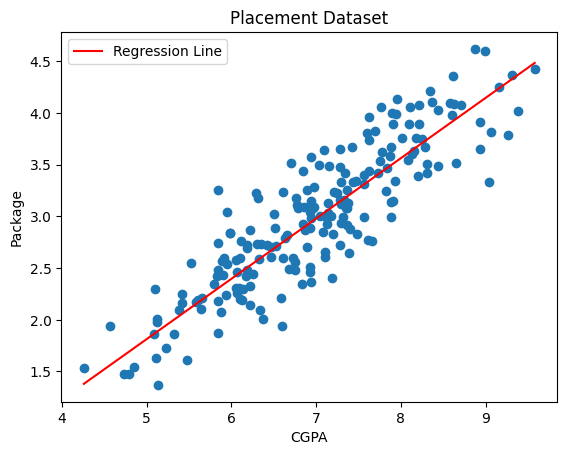

In [27]:
plt.scatter(X, y)
x1, x2 = X.min(), X.max()
y1 = model.predict(x1)
y2 = model.predict(x2)
plt.plot([x1,x2], [y1,y2], color='red', label='Regression Line')
plt.legend(loc='upper left', labelcolor='black')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Placement Dataset')
plt.show()

## Comparing with scikit-learn

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()
lr.fit(xTrain.reshape(150,1), yTrain)

LinearRegression()

In [30]:
print(f"Sklearn model:\t\tm = {lr.coef_[0]}\t b = {lr.intercept_}")
print(f"Model from Scrach:\tm = {model.get_parameters()[0]}\t b = {model.get_parameters()[1]}")

Sklearn model:		m = 0.5835038630094875	 b = -1.1053173967435002
Model from Scrach:	m = 0.5835038630094875	 b = -1.1053173967435002


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Sklearn Model:")
print("Mean Absolute Error =\t", mean_absolute_error(yTest, model.predict(xTest)))
print("Mean Squared Error =\t", mean_squared_error(yTest, model.predict(xTest)))
print("Root Mean Squared Error =", np.sqrt(mean_squared_error(yTest, model.predict(xTest))))
print("R2 Score =\t", r2_score(yTest, model.predict(xTest)))

Sklearn Model:
Mean Absolute Error =	 0.2630222933104087
Mean Squared Error =	 0.10330072547474604
Root Mean Squared Error = 0.3214043022032313
R2 Score =	 0.6932432216886684


In [32]:
print("Model from Scrach:")
model.evaluate(yTest, model.predict(xTest))

Model from Scrach:
Mean Absolute Error =	 0.2630222933104087
Mean Squared Error =	 0.10330072547474604
Root Mean Squared Error t 0.3214043022032313
R2 Score =	 0.6932432216886684
